
Accuracy on Training Set :0.9984375
Checking on Test Set

Accuracy on Testing Set :0.9875776397515528

Precision Score
[0.96721311 1.         1.         1.         1.        ]

Recall Score
[1.         1.         1.         0.91304348 1.        ]

F1 Score
[0.98333333 1.         1.         0.95454545 1.        ]

Accuracy on Training Set :0.9984399375975039
Checking on Test Set

Accuracy on Testing Set :0.975

Precision Score
[0.93442623 1.         1.         1.         1.        ]

Recall Score
[1.         0.90909091 1.         0.91428571 1.        ]

F1 Score
[0.96610169 0.95238095 1.         0.95522388 1.        ]

Accuracy on Training Set :1.0
Checking on Test Set

Accuracy on Testing Set :0.9875

Precision Score
[0.98507463 1.         1.         0.96774194 1.        ]

Recall Score
[0.98507463 1.         0.96153846 1.         1.        ]

F1 Score
[0.98507463 1.         0.98039216 0.98360656 1.        ]

Accuracy on Training Set :0.9984399375975039
Checking on Test Set

Accuracy 

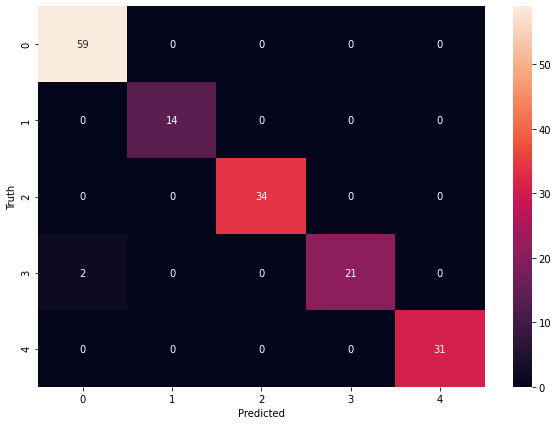

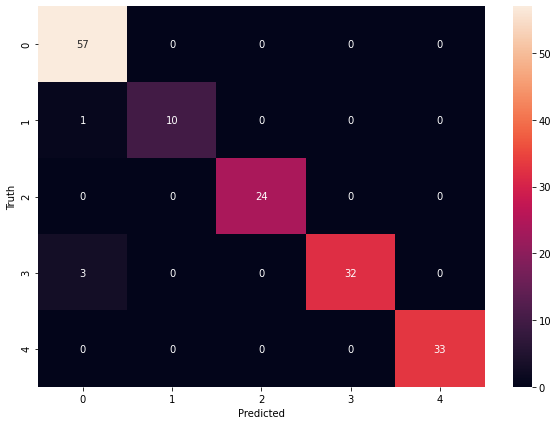

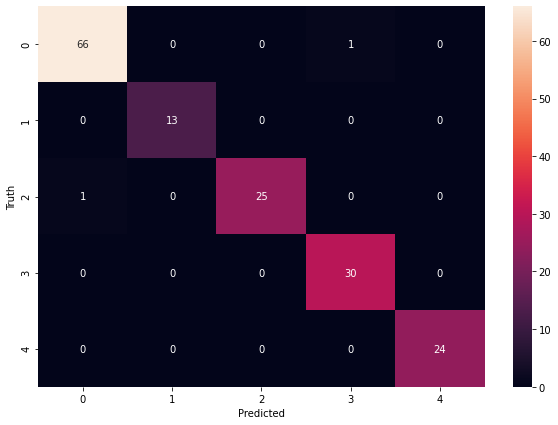

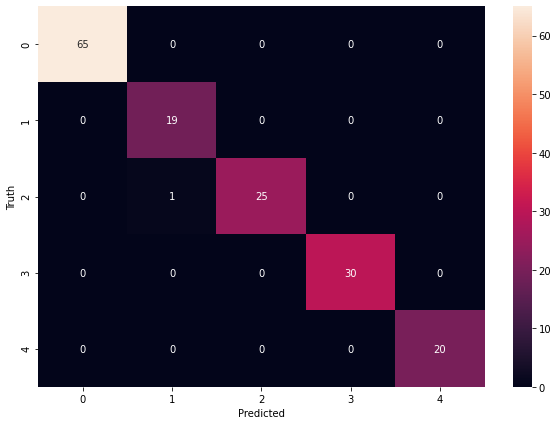

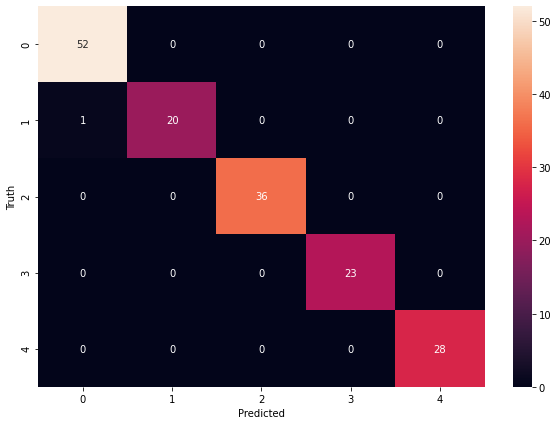

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, recall_score, precision_score, f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

## Read data and labels from csv's

label = pd.read_csv('labels.csv')
data = pd.read_csv('data.csv')
features = data.values[:,1:]

#Encode the variable 

encode = preprocessing.LabelEncoder()
encode.fit(label.Class.unique())
target = encode.transform(label.Class.values)


# Performing K-Folds cross validation
KF = KFold(n_splits=5,shuffle=True)
for train_index, test_index in KF.split(features):

    # Splitting train & test
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    #Feature Selection with chi2 test
    ch2 = SelectKBest(chi2, k=20)
    ch_train = ch2.fit_transform(x_train, y_train)
    ch_test = ch2.transform(x_test)


    # Classification model:RANDOM FOREST

    model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
    model.fit(ch_train, y_train)

    #Predicted values of target
    y_pred = model.predict(ch_test)

    # Model Scores

    print ("\nAccuracy on Training Set :"+str(model.score(ch_train, y_train)))
    print ("Checking on Test Set")
    print ("\nAccuracy on Testing Set :"+str(accuracy_score(y_test,y_pred)))
  

    print ("\nPrecision Score")
    print (precision_score(y_test, y_pred,average=None))
    print ("\nRecall Score")
    print (recall_score(y_test, y_pred,average=None))
    print ("\nF1 Score")
    print (f1_score(y_test, y_pred,average=None))

    #Confusion Matrix
    conf_mat=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,7))
    sn.heatmap(conf_mat, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')